###  How to find the threshold probability to maximize Recall and Precision

- This notebook uses MNIST data set  for digits classification
- mnist_784 contails 28 x 28 images
- The threshold probability can decide the performance of the model 
- the threshold can be choosen in such a way that it gives expected Recall and Precision

In [1]:
#-- sklearn has helper function to download mnist dataset


from sklearn.datasets  import fetch_openml

mnist = fetch_openml("mnist_784", version = 1)

In [2]:
# mnist.keys()
# mnist.DESCR #mnist.target
print(mnist.data.shape)


(70000, 784)


In [3]:
X, y = mnist.data, mnist.target

### display an image from the dataset

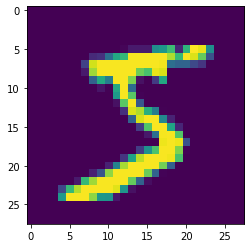

In [4]:
sample_img = X[0]
import matplotlib.pyplot as plt

plt.imshow(sample_img.reshape(28,28))
plt.show()

In [5]:
y[0]

'5'

In [6]:
import numpy as np
print(y.astype(np.uint8))
y = y.astype(np.uint8)

[5 0 4 ... 4 5 6]


In [7]:
x_train, y_train, x_test, y_test = X[:60000],y[:60000],X[60000:], y[60000:]

### Lets build a binary classifier to detect digit 5

In [8]:
y_train[y_train==5]

array([5, 5, 5, ..., 5, 5, 5], dtype=uint8)

In [9]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [10]:
# model to classify 5 
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train,y_train_5)

SGDClassifier()

In [11]:
some_digit = x_test[17]
sgd.predict(some_digit.reshape(1,-1))

array([False])

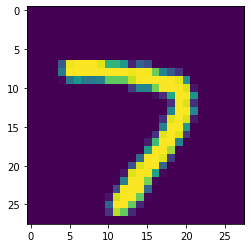

In [12]:
from matplotlib import pyplot as plt
plt.imshow(some_digit.reshape(28,28))

In [13]:
preds = sgd.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score,classification_report

In [15]:
print(confusion_matrix( y_test_5, preds))
print(accuracy_score( y_test_5, preds))
print(precision_score( y_test_5, preds))
print(recall_score( y_test_5, preds))
print(classification_report( y_test_5, preds))

[[8939  169]
 [ 154  738]]
0.9677
0.8136714443219405
0.827354260089686
              precision    recall  f1-score   support

       False       0.98      0.98      0.98      9108
        True       0.81      0.83      0.82       892

    accuracy                           0.97     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.97      0.97      0.97     10000



but this is not good enogh to decide upon
we need to do cross validation of the results to find actual results

### Performance measures

In [21]:
# # through cross validation 
from sklearn.model_selection import cross_val_score, cross_val_predict
# cross_val_score(sgd, x_test, y_test_5, scoring = "precision", cv = 3)

In [22]:
#--------------- training performance calculation 
# k fold train-test set and eveluation o small test portion
y_sgd_pred = cross_val_predict(sgd, x_train, y_train_5, cv= 3)

In [23]:
len(y_train_5)

60000

In [24]:
#------- f1score : high when both precision and recall is high, low when either of them is low
from sklearn.metrics import f1_score
print(f1_score(y_train_5, y_sgd_pred))
print(classification_report(y_train_5,y_sgd_pred))
print(confusion_matrix(y_train_5,y_sgd_pred))
print(accuracy_score(y_train_5,y_sgd_pred))



0.7711724894823486
              precision    recall  f1-score   support

       False       0.98      0.98      0.98     54579
        True       0.76      0.78      0.77      5421

    accuracy                           0.96     60000
   macro avg       0.87      0.88      0.87     60000
weighted avg       0.96      0.96      0.96     60000

[[53282  1297]
 [ 1205  4216]]
0.9583


In [25]:
#----------- it is a good model with accuracy 93 percentatge and that is imposiible 
# so lets find what is the benchmark model accuracy

In [26]:
# lets define a non 5 classifier 

from sklearn.base import BaseEstimator

class never5classifier (BaseEstimator):
    def fit(self, X,y=None):
        return self
        
    def predict(self,X):
        return (np.zeros(len(X)))

clr = never5classifier()
clr.fit(x_train,y_train_5)
pred = clr.predict(x_test)
        

In [27]:
print(classification_report(y_test_5,pred))
print(confusion_matrix(y_test_5,pred))
print(accuracy_score(y_test_5,pred))

              precision    recall  f1-score   support

       False       0.91      1.00      0.95      9108
        True       0.00      0.00      0.00       892

    accuracy                           0.91     10000
   macro avg       0.46      0.50      0.48     10000
weighted avg       0.83      0.91      0.87     10000

[[9108    0]
 [ 892    0]]
0.9108


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
# even this has 91 perc accuraccy . that is why accuracy is not a good score

### Placing  threshold of probability/score of prediction helps to choose recall and precision

In [29]:
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train,y_train_5)
pred = sgd.predict(x_test)

In [31]:
pred

array([False, False, False, ..., False,  True, False])

In [32]:
# y_sgd_pred  i sthe prediction from sgd

# how to choose threshold ?
pred_score = sgd.decision_function(x_test)

In [33]:
pred = pred_score>2000
print(confusion_matrix(y_test_5,pred))
print(accuracy_score(y_test_5,pred))
print(precision_score(y_test_5,pred))
print(recall_score(y_test_5,pred))


[[9057   51]
 [ 341  551]]
0.9608
0.915282392026578
0.6177130044843049


In [34]:
# y_sgd_pred  i sthe prediction from sgd

# how to choose threshold ?
pred = pred_score>-500
print(confusion_matrix(y_test_5,pred))
print(accuracy_score(y_test_5,pred))
print(precision_score(y_test_5,pred))
print(recall_score(y_test_5,pred))


[[8889  219]
 [ 141  751]]
0.964
0.7742268041237114
0.8419282511210763


In [35]:
#----------------- test scores, plot graph and choose threshold


In [36]:
from sklearn.metrics import precision_recall_curve
prec, recall, thresholds = precision_recall_curve(y_test_5, pred_score)

In [37]:
len(prec)

9745

In [38]:
len(thresholds)

9744

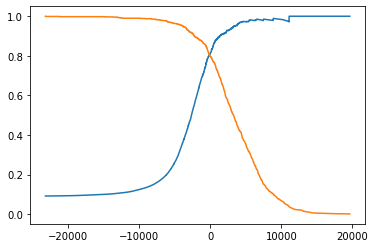

In [39]:

from matplotlib import pyplot as plt
plt.plot(thresholds, prec[:-1])
plt.plot(thresholds, recall[:-1])

# plt.figure(figsize=(10,10))
plt.show()

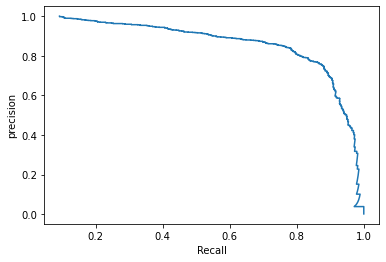

In [40]:
plt.plot(prec[:-1],recall[:-1])
plt.ylabel("precision")
plt.xlabel("Recall")
plt.show()

In [41]:
thresholds

array([-23226.68572867, -23195.48308017, -23149.57722622, ...,
        16947.24264293,  17514.20257481,  19627.8072577 ])

In [42]:
# recall drops after 60% precision
# if  precision is important , ie i can reject many 5s as non 5s , no problem.
# but what i suggest as 5 should be absolutely correct, most of the time

# so i want 90% precision.

thresholds[np.argmax(prec>0.9)]

1329.027230322098

In [43]:
np.argmax(prec>0.9)

9060

In [44]:
# prec[9030:]

In [45]:
#-------- applying threshold

pred = pred_score>2187.1049017640103
print(confusion_matrix(y_test_5,pred))
print(accuracy_score(y_test_5,pred))
print(precision_score(y_test_5,pred))
print(recall_score(y_test_5,pred))

[[9061   47]
 [ 365  527]]
0.9588
0.9181184668989547
0.5908071748878924


In [46]:
# we now have a 90% precuison classifier at 71% recall



### ROC curve

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(pred,y_test_5)

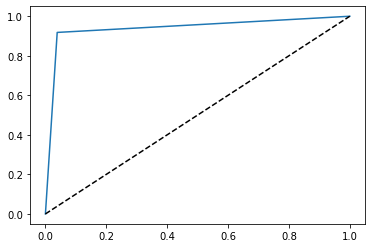

In [48]:
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], "k--")

In [49]:
roc_auc_score(pred, y_test_5)

0.9396978924776973

In [50]:
# this looks good but it is not a good measure. PR graph is a good indicator here 
# that the model has room for improvements
# This is because or 1s are low.and we care about False positives(precision) , not false negatives, 

### RF classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier()
y_prob_rf = cross_val_predict(model_rf, x_train, y_train_5, method = "predict_proba")

In [52]:
fpr, tpr, threshold = roc_curve(y_train_5, y_prob_rf[:,1])

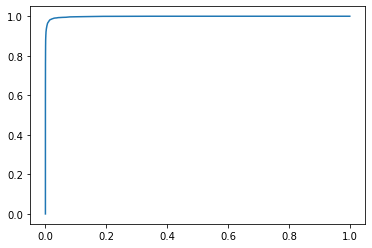

In [53]:
plt.plot(fpr,tpr)

In [54]:
roc_auc_score(y_train_5,  y_prob_rf[:,1])

0.9984868377152626

In [55]:
prec, recall , thresholds = precision_recall_curve(y_train_5,y_prob_rf[:,1])

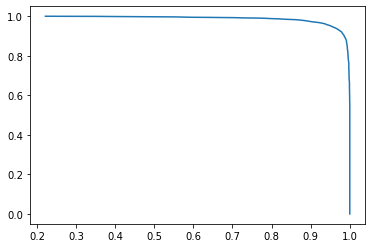

In [56]:
plt.plot(prec,recall)

In [57]:
prec[np.argmax(recall<.80)]

0.9958207569073602

### Multiclass classification

In [ ]:
#----------- SVC is a binary classifier 
# when mutilabeled data is put in, it creates several One Vs One Classifiers

from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(x_train,y_train)


In [ ]:
pred_svm = model_svm.predict (x_test)

In [ ]:
model_svm.decision_function([x_test[1]])

In [ ]:
model_svm.classes_

In [ ]:
roc_auc_score(y_test_5, preds)

In [ ]:
classification_report(y_test_5, preds)

### Error analysis

In [ ]:

# pred_svm = cross_val_predict(model_svm, x_train, y_train, cv=3)
a = confusion_matrix(y_train, preds)

In [ ]:
plt.matshow(a)

In [ ]:
row_sum= np.sum(a, axis=1, keepdims=1)
conf = a/row_sum

In [ ]:
plt.matshow(conf)

this shows that :
 - prediction for 8 is pretty good with SVM classifier
 - prediction for 5 and 3 are often miss classified.
 - we would look at 3 and 5 predictions now

In [18]:
cls_a , cls_b = 3,5

X_aa = x_train[(y_train==cls_a) & (pred_svm==cls_a)]
X_ab = x_train[(y_train==cls_a) & (pred_svm==cls_b)]
X_ba = x_train[(y_train==cls_b) & (pred_svm==cls_a)]
X_bb = x_train[(y_train==cls_b) & (pred_svm==cls_b)]

NameError: name 'pred_svm' is not defined

In [ ]:
plt.figure()
plt.subplot(221); plt.imshow(X_aa[:10])
plt.subplot(222); plt.imshow(X_ab[:10])
plt.subplot(223); plt.imshow(X_ba[:10])
plt.subplot(224); plt.imshow(X_bb[:10])

In [ ]:
plt.show()

### Multilabel classification

 - k nearest neighbors is a multilabel classifiers
 - gives multiple class output (as a list ) for feature set

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
model = KNeighborsClassifier()

In [24]:
seven = (y_train>=7)
odd = (y_train%2==1)
np.c_[seven,odd]

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [25]:
y_multi = np.c_[seven,odd]
model.fit(x_train, y_multi)

KNeighborsClassifier()

In [28]:
model.predict([x_test[10]])

array([[False, False]])

In [ ]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model, x_train[:10], y_multi[:10])

In [ ]:
f1_score(y_multi, pred)